In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
os.chdir("C:/Users/Dell/BusinessAnalyst/3.Diabeties")
os.getcwd()

'C:\\Users\\Dell\\BusinessAnalyst\\3.Diabeties'

In [3]:
data = pd.read_csv("Diabeties.csv")
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Missing Value Analysis

In [4]:
missing_value = pd.DataFrame(data.isnull().sum())
missing_value

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### We dont have any Missing Value

# Outlier Analysis

In [5]:
#outliers
df = data.copy()

In [6]:
cnames = data.columns
cnames

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#plotting boxplot
def removeOutliers(data, cnames):
    for i in cnames:
        print(i)
        q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min=q25 - (iqr*1.5)
        max=q75 + (iqr*1.5)
    
        data = data.drop(data[data.loc[:,i]<min].index)
        data = data.drop(data[data.loc[:,i]>max].index)
    return data

In [8]:
df = removeOutliers(df, cnames)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [9]:
df.shape

(636, 9)

#### Outliers are removed

# Feature Selection

In [10]:
#correlation analysis, plot
df_corr = data.loc[:, cnames != 'Outcome']

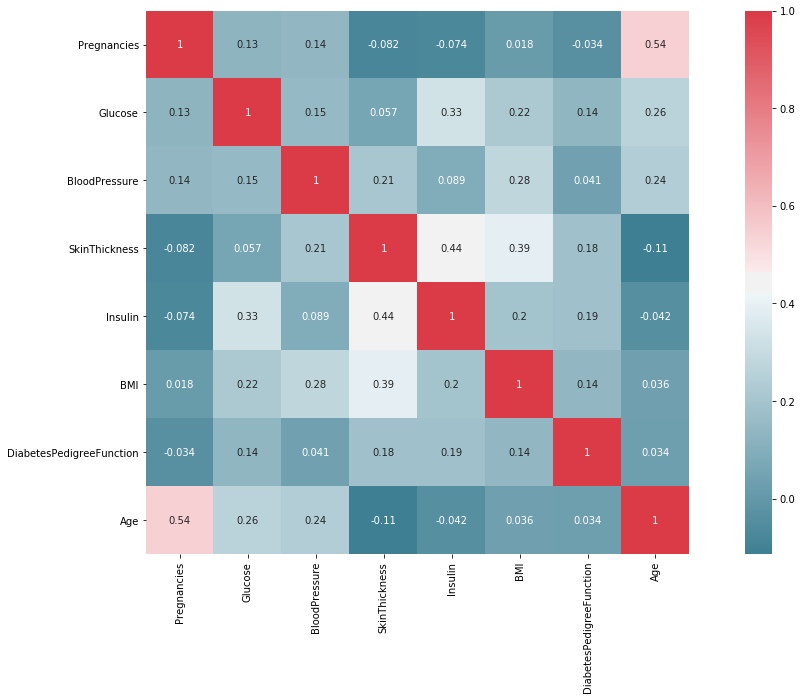

In [11]:
#set the width and height of plot
f, ax = plt.subplots(figsize=(20,10))

#generate correlation
corr = df_corr.corr()

#plot using seaborn
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)

#### There are no highly positive correlated and highly negative correlated values.

# Feature scaling

In [12]:
df = data.copy()

Pregnancies


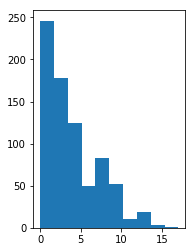

Glucose


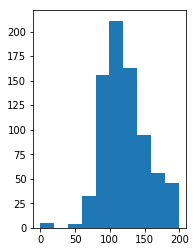

BloodPressure


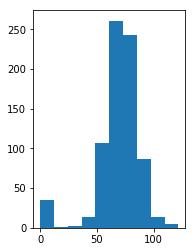

SkinThickness


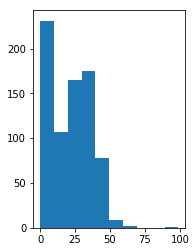

Insulin


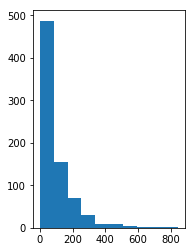

BMI


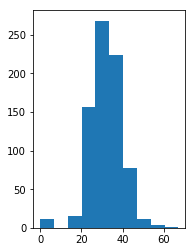

DiabetesPedigreeFunction


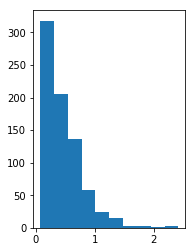

Age


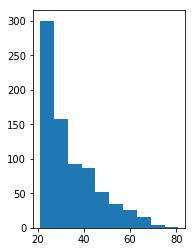

Outcome


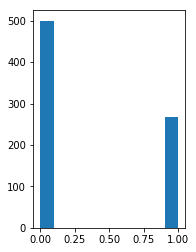

In [13]:
#checking for normality
#plt.hist(data['BloodPressure'], bins='auto')

for i in cnames:
    print(i)
    plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
    plt.hist(df[i])
    plt.show()

#### Since the values are continuous we use Normalisation.

In [14]:
cnames = data.iloc[:,0:8].columns

In [15]:
#normalisation
for i in cnames:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [16]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


#### Here all the values are in the range between 0 and 1

In [17]:
#dividing data to train and test
X=data.iloc[:,0:8]
Y=data.iloc[:,8]

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

### Since the Dependent variable values are either 0 or 1, We use Classification methods.

# Decision Tree Classifier

In [18]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier().fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

train_accuracy = dec_tree.score(x_train, y_train)
test_accuracy = dec_tree.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  100.0
Testing Accuracy is  70.12987012987013


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 5).fit(x_train, y_train)
RF_predict = RF.predict(x_test)

train_accuracy = RF.score(x_train, y_train)
test_accuracy = RF.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  97.76536312849163
Testing Accuracy is  74.02597402597402


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x_train,y_train)
LR_predict = logistic.predict(x_test)

train_accuracy = logistic.score(x_train, y_train)
test_accuracy = logistic.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  78.58472998137802
Testing Accuracy is  74.45887445887446


In [21]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,predictions))

# KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train)
KNN_predict = KNN_model.predict(x_test)

train_accuracy = KNN_model.score(x_train, y_train)
test_accuracy = KNN_model.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  84.91620111731844
Testing Accuracy is  73.59307359307358


In [23]:
# df = pd.DataFrame({'Actual': y_test, 'Predicted': KNN_predict.flatten()})
# df1 = df.head(10)
# df1.plot(kind='bar',figsize=(16,5))
# plt.grid(which='major', linestyle='-', linewidth='0.5')
# plt.grid(which='minor', linestyle=':', linewidth='0.5')
# plt.show()

# Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB().fit(x_train,y_train)
NB_predict = NB_model.predict(x_test)

train_accuracy = NB_model.score(x_train, y_train)
test_accuracy = NB_model.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  77.46741154562383
Testing Accuracy is  75.75757575757575


### DONE